# Comparing pass managers
This notebook display graphs comparing
- Depth
- Depth ratio
- Time
- Cx gate count
- Total gate count
of all of the pass managers. 

It will also display a table summarizing the results and shows the percent different compared to sabre_v020 routing pass.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast
import os

In [2]:
# Variables to change
qc_name = "ghz_100"
excluded_datasets = []

In [3]:
directory_path = f'data/{qc_name}'
files = [f for f in os.listdir(directory_path) if f.endswith('.csv') and f.replace('.csv', '') not in excluded_datasets]

datasets = {}
for file in files:
    dataset_path = os.path.join(directory_path, file)
    dataset_name = file.replace('.csv', '')
    datasets[dataset_name] = pd.read_csv(dataset_path)

# Sorting dataset names (excluding the reference dataset)
ref_dataset_name = 'sabre_v020'  # Change as needed
sorted_dataset_names = sorted([name for name in datasets.keys() if name != ref_dataset_name])

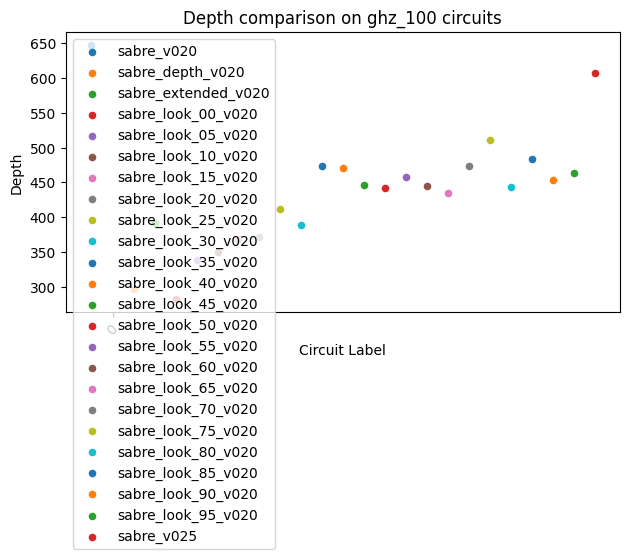

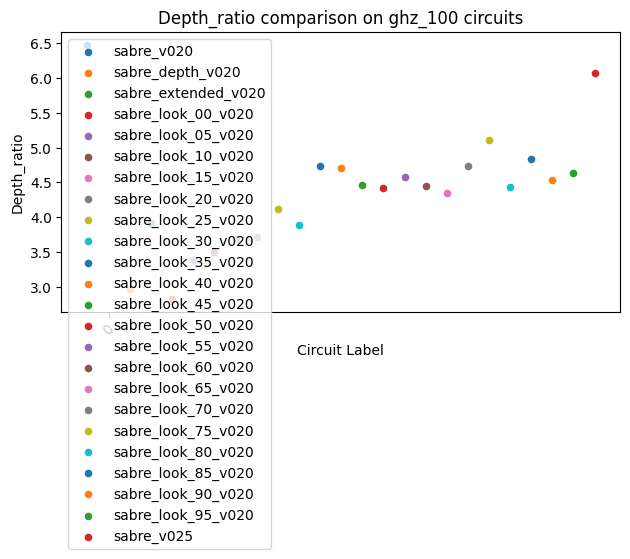

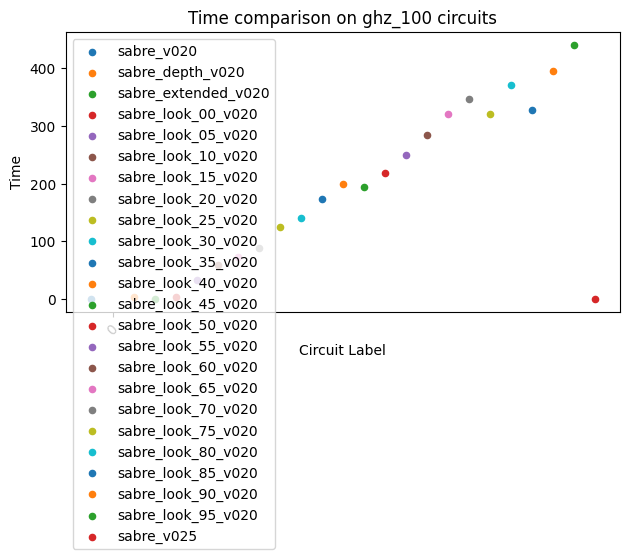

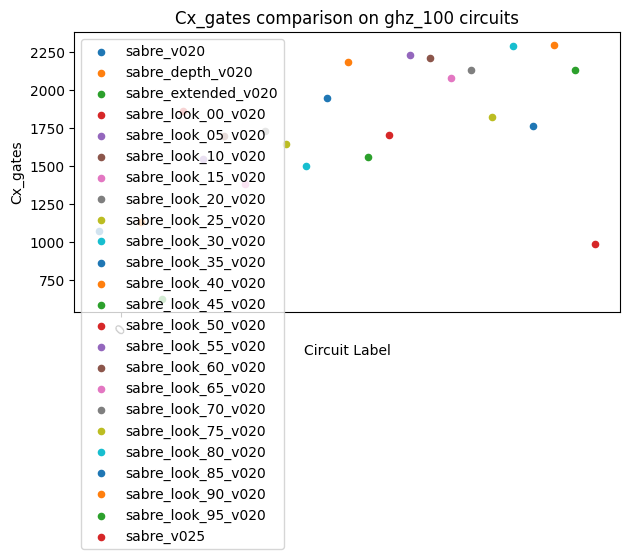

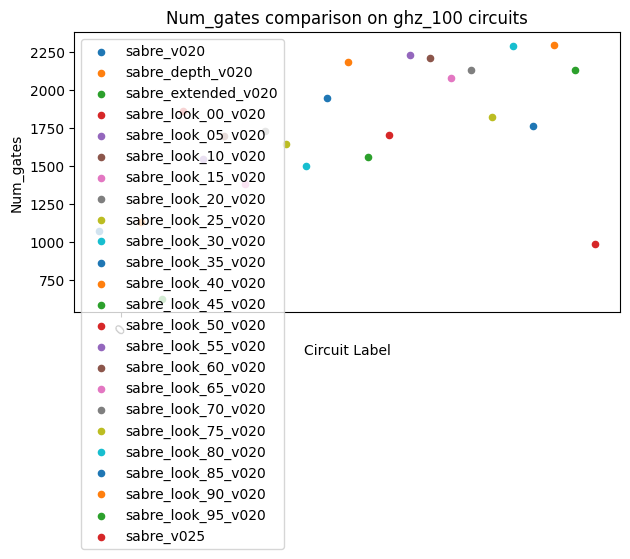

In [4]:


labels = list(set(sum([df['circuit label'].tolist() for df in datasets.values()], [])))
labels.sort()

x = np.arange(len(labels))
num_datasets = len(datasets) - 1  # excluding the reference dataset
shift = 0.15
shift_increment = (num_datasets * shift) / (num_datasets + 1)

# Plotting each attribute
attributes = ['depth', 'depth_ratio', 'time', 'cx_gates', 'num_gates']
for attribute in attributes:
    fig, ax = plt.subplots()

    # Plotting reference dataset separately
    ref_values = [ast.literal_eval(item)[attribute] for item in datasets[ref_dataset_name]['best_data']]
    ref_vals = [ref_values[datasets[ref_dataset_name]['circuit label'].tolist().index(label)] if label in datasets[ref_dataset_name]['circuit label'].tolist() else 0 for label in labels]
    ax.scatter(x - shift, ref_vals, label=ref_dataset_name, s=20)

    # Plotting other datasets
    for i, dataset_name in enumerate(sorted_dataset_names):
        df = datasets[dataset_name]
        values = [ast.literal_eval(item)[attribute] for item in df['best_data']]
        vals = [values[df['circuit label'].tolist().index(label)] if label in df['circuit label'].tolist() else 0 for label in labels]
        
        ax.scatter(x + (i + 1) * shift_increment, vals, label=dataset_name, s=20)

    # Setting labels and title
    ax.set_xlabel('Circuit Label')
    ax.set_ylabel(attribute.capitalize())
    ax.set_title(f'{attribute.capitalize()} comparison on {qc_name} circuits')

    # Setting ticks
    n = 10
    ax.set_xticks(x[::n])
    ax.set_xticklabels(labels[::n], rotation=45)

    ax.legend()
    fig.tight_layout()
    plt.show()



In [5]:
if ref_dataset_name not in datasets:
    raise ValueError(f"Reference dataset '{ref_dataset_name}' not found in the provided directory.")

attributes = ['depth', 'depth_ratio', 'time', 'cx_gates', 'num_gates']
avg_results = {attribute: [] for attribute in attributes}
sorted_dataset_names = sorted(datasets.keys())


for attribute in attributes:
    ref_values = [ast.literal_eval(item)[attribute] for item in datasets[ref_dataset_name]['best_data']]
    ref_avg = np.mean(ref_values)
    
    for dataset_name in sorted_dataset_names:
        if dataset_name == ref_dataset_name:
            continue

        df = datasets[dataset_name]
        values = [ast.literal_eval(item)[attribute] for item in df['best_data']]
        avg = np.mean(values)
        percent_diff = ((avg - ref_avg) / ref_avg) * 100

        avg_results[attribute].append([dataset_name, avg, percent_diff])


for attribute in avg_results:
    avg_comparison = pd.DataFrame(avg_results[attribute], columns=['Dataset', f'Average {attribute.capitalize()}', 'Percentage Difference (%)'])
    print(f"--- {attribute.capitalize()} Comparison ---")
    print(avg_comparison)
    print("\n")

--- Depth Comparison ---
                Dataset  Average Depth  Percentage Difference (%)
0      sabre_depth_v020          297.0                 -54.166667
1   sabre_extended_v020          391.0                 -39.660494
2    sabre_look_00_v020          282.0                 -56.481481
3    sabre_look_05_v020          338.0                 -47.839506
4    sabre_look_10_v020          350.0                 -45.987654
5    sabre_look_15_v020          368.0                 -43.209877
6    sabre_look_20_v020          371.0                 -42.746914
7    sabre_look_25_v020          411.0                 -36.574074
8    sabre_look_30_v020          389.0                 -39.969136
9    sabre_look_35_v020          474.0                 -26.851852
10   sabre_look_40_v020          470.0                 -27.469136
11   sabre_look_45_v020          446.0                 -31.172840
12   sabre_look_50_v020          442.0                 -31.790123
13   sabre_look_55_v020          457.0             

In [6]:
import ast
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


--- Depth Comparison ---
                Dataset  Average Depth  Percentage Difference (%)
0      sabre_depth_v020          297.0                 -54.166667
1   sabre_extended_v020          391.0                 -39.660494
2    sabre_look_00_v020          282.0                 -56.481481
3    sabre_look_05_v020          338.0                 -47.839506
4    sabre_look_10_v020          350.0                 -45.987654
5    sabre_look_15_v020          368.0                 -43.209877
6    sabre_look_20_v020          371.0                 -42.746914
7    sabre_look_25_v020          411.0                 -36.574074
8    sabre_look_30_v020          389.0                 -39.969136
9    sabre_look_35_v020          474.0                 -26.851852
10   sabre_look_40_v020          470.0                 -27.469136
11   sabre_look_45_v020          446.0                 -31.172840
12   sabre_look_50_v020          442.0                 -31.790123
13   sabre_look_55_v020          457.0             

/var/folders/jt/44gl1rhd26v6ykt0frqzl87r0000gn/T/ipykernel_34100/1874323551.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=reordered_comparison, x='Dataset', y='Percentage Difference (%)', palette='viridis')


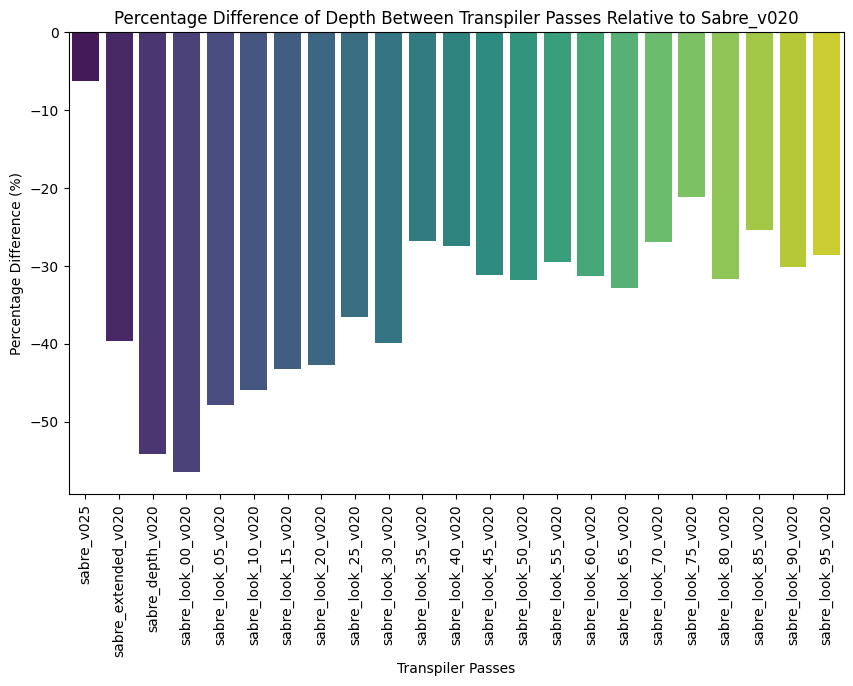

--- Depth_ratio Comparison ---
                Dataset  Average Depth_ratio  Percentage Difference (%)
0      sabre_depth_v020                 2.97                 -54.166667
1   sabre_extended_v020                 3.91                 -39.660494
2    sabre_look_00_v020                 2.82                 -56.481481
3    sabre_look_05_v020                 3.38                 -47.839506
4    sabre_look_10_v020                 3.50                 -45.987654
5    sabre_look_15_v020                 3.68                 -43.209877
6    sabre_look_20_v020                 3.71                 -42.746914
7    sabre_look_25_v020                 4.11                 -36.574074
8    sabre_look_30_v020                 3.89                 -39.969136
9    sabre_look_35_v020                 4.74                 -26.851852
10   sabre_look_40_v020                 4.70                 -27.469136
11   sabre_look_45_v020                 4.46                 -31.172840
12   sabre_look_50_v020          

/var/folders/jt/44gl1rhd26v6ykt0frqzl87r0000gn/T/ipykernel_34100/1874323551.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=reordered_comparison, x='Dataset', y='Percentage Difference (%)', palette='viridis')


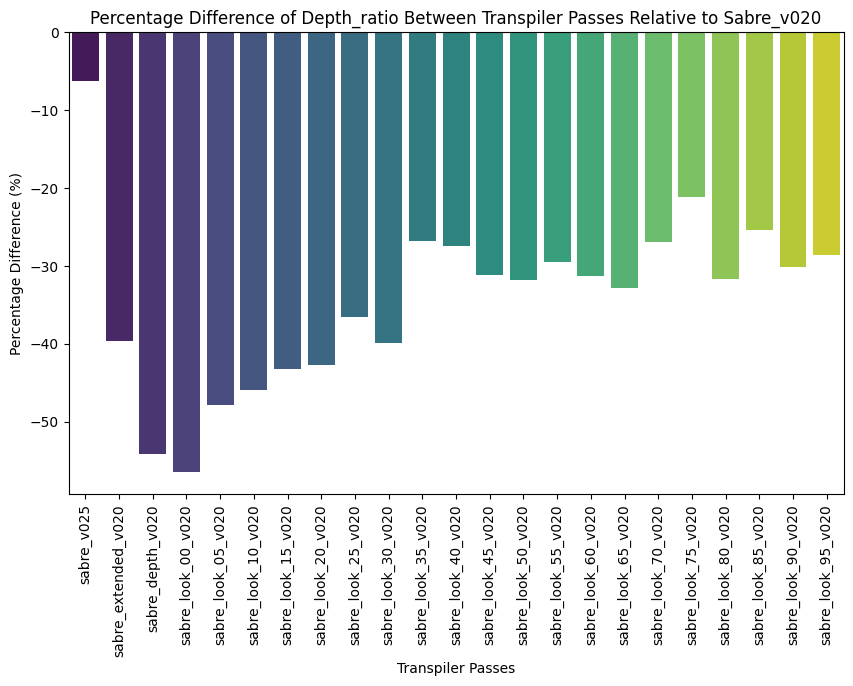

--- Time Comparison ---
                Dataset  Average Time  Percentage Difference (%)
0      sabre_depth_v020      3.335806                1223.996313
1   sabre_extended_v020      0.242517                  -3.743918
2    sabre_look_00_v020      4.447660                1665.296181
3    sabre_look_05_v020     32.959961               12981.956349
4    sabre_look_10_v020     60.008553               23717.663714
5    sabre_look_15_v020     72.828126               28805.809678
6    sabre_look_20_v020     88.387000               34981.196570
7    sabre_look_25_v020    124.230941               49207.817335
8    sabre_look_30_v020    140.290866               55582.073595
9    sabre_look_35_v020    173.763904               68867.672514
10   sabre_look_40_v020    199.788051               79196.773043
11   sabre_look_45_v020    194.550728               77118.056047
12   sabre_look_50_v020    218.974245               86811.859430
13   sabre_look_55_v020    250.091504               99162.439130
1

/var/folders/jt/44gl1rhd26v6ykt0frqzl87r0000gn/T/ipykernel_34100/1874323551.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=reordered_comparison, x='Dataset', y='Percentage Difference (%)', palette='viridis')


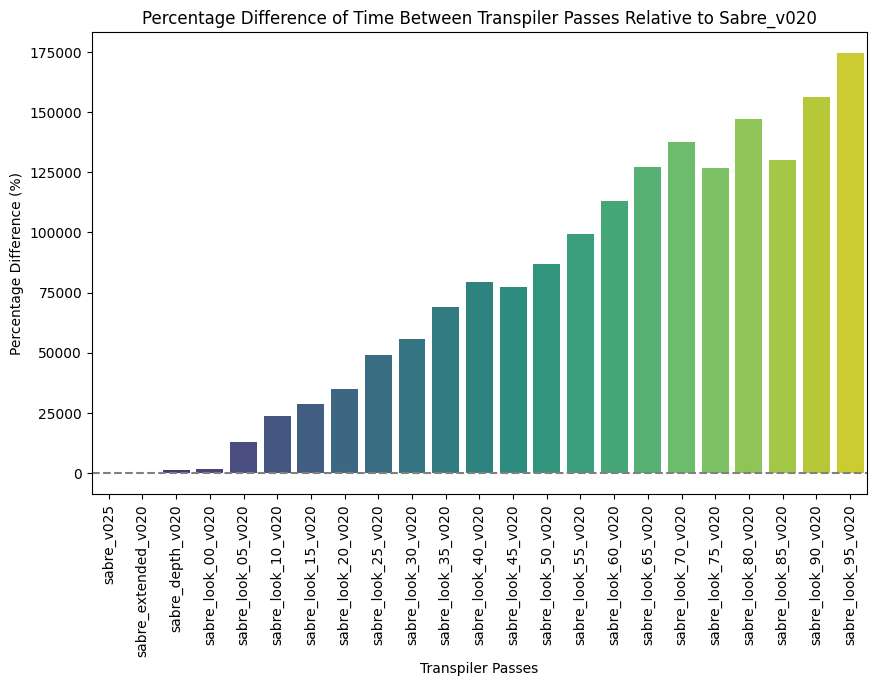

--- Cx_gates Comparison ---
                Dataset  Average Cx_gates  Percentage Difference (%)
0      sabre_depth_v020            1131.0                   5.898876
1   sabre_extended_v020             621.0                 -41.853933
2    sabre_look_00_v020            1863.0                  74.438202
3    sabre_look_05_v020            1548.0                  44.943820
4    sabre_look_10_v020            1698.0                  58.988764
5    sabre_look_15_v020            1380.0                  29.213483
6    sabre_look_20_v020            1734.0                  62.359551
7    sabre_look_25_v020            1644.0                  53.932584
8    sabre_look_30_v020            1503.0                  40.730337
9    sabre_look_35_v020            1947.0                  82.303371
10   sabre_look_40_v020            2187.0                 104.775281
11   sabre_look_45_v020            1557.0                  45.786517
12   sabre_look_50_v020            1704.0                  59.550562
13   s

/var/folders/jt/44gl1rhd26v6ykt0frqzl87r0000gn/T/ipykernel_34100/1874323551.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=reordered_comparison, x='Dataset', y='Percentage Difference (%)', palette='viridis')


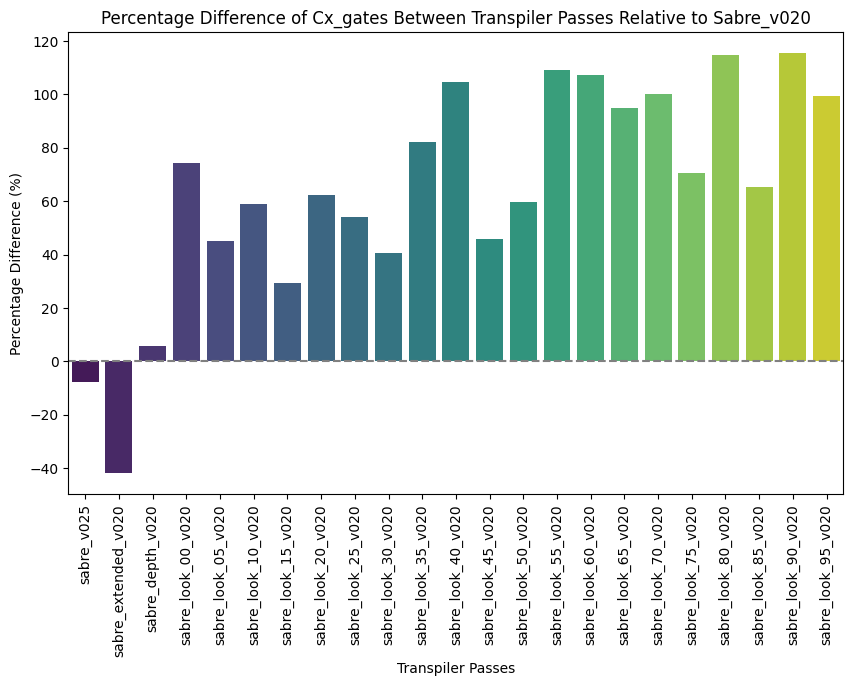

--- Num_gates Comparison ---
                Dataset  Average Num_gates  Percentage Difference (%)
0      sabre_depth_v020             1132.0                   5.893358
1   sabre_extended_v020              622.0                 -41.814780
2    sabre_look_00_v020             1864.0                  74.368569
3    sabre_look_05_v020             1549.0                  44.901777
4    sabre_look_10_v020             1699.0                  58.933583
5    sabre_look_15_v020             1381.0                  29.186155
6    sabre_look_20_v020             1735.0                  62.301216
7    sabre_look_25_v020             1645.0                  53.882133
8    sabre_look_30_v020             1504.0                  40.692236
9    sabre_look_35_v020             1948.0                  82.226380
10   sabre_look_40_v020             2188.0                 104.677268
11   sabre_look_45_v020             1558.0                  45.743686
12   sabre_look_50_v020             1705.0                  5

/var/folders/jt/44gl1rhd26v6ykt0frqzl87r0000gn/T/ipykernel_34100/1874323551.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=reordered_comparison, x='Dataset', y='Percentage Difference (%)', palette='viridis')


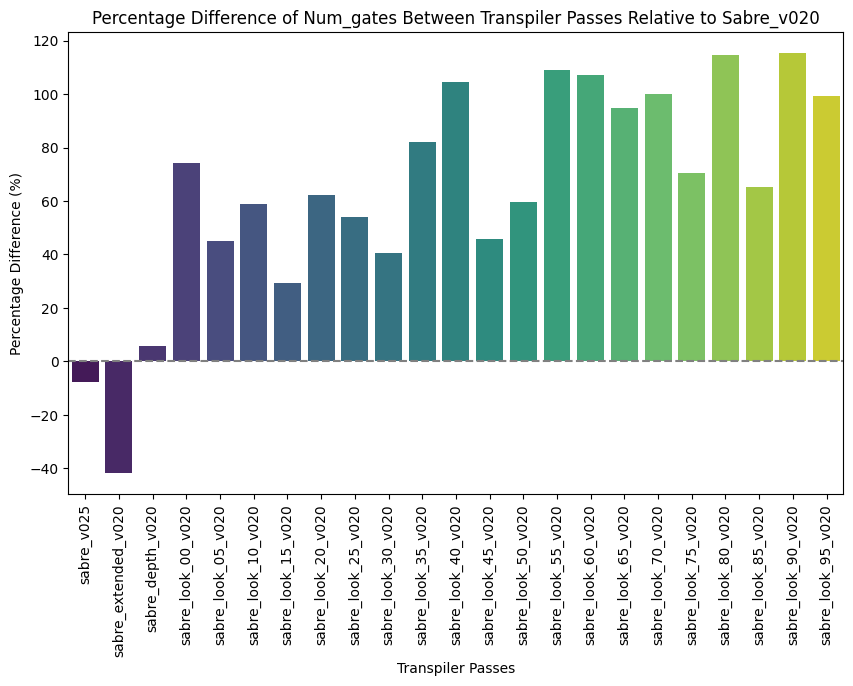

In [7]:
# Swapping the placement of the second and third bar in the adjusted bar graphs

for attribute in avg_results:
    avg_comparison = pd.DataFrame(avg_results[attribute], columns=['Dataset', f'Average {attribute.capitalize()}', 'Percentage Difference (%)'])
    print(f"--- {attribute.capitalize()} Comparison ---")
    print(avg_comparison)
    print("\n")

    # Reordering the dataset so that the last one is now first and then swapping the second and third bars
    reordered_comparison = avg_comparison.sort_values('Dataset')
    reordered_comparison = pd.concat([reordered_comparison.iloc[-1:], reordered_comparison.iloc[:-1]])
    reordered_comparison.iloc[[1, 2]] = reordered_comparison.iloc[[2, 1]].values

    # Plotting with the newly adjusted order
    plt.figure(figsize=(10, 6))
    sns.barplot(data=reordered_comparison, x='Dataset', y='Percentage Difference (%)', palette='viridis')
    plt.title(f'Percentage Difference of {attribute.capitalize()} Between Transpiler Passes Relative to Sabre_v020')
    plt.xlabel('Transpiler Passes')
    plt.xticks(rotation=90)  # Rotate x-axis labels to vertical
    plt.ylabel('Percentage Difference (%)')
    plt.axhline(0, color='gray', linestyle='--')  # Horizontal line at x = 0
    plt.show()
